EDA with Python and Applying Logistic Regression
* We use the titanic dataset to demo how to go about an EDA for a typical python project. 

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [7]:
df=sns.load_dataset("titanic")

In [8]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [12]:
# Report on the missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
df.isnull()

survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False       False   True        False  False  False  
1    False       False  False        False  False  False  
2    False       False   True        False  False  False  
3    False       False  False        False  False  False  
4    False       False   True        False  False  False  
..     ...         ...    ...          ...    ...    ...  
886  False       False   True        False  False  False  
887  False       False  False        False  False  False  
888  False       False   True        False  False  False  
889  False       False  False        False  False  False  
890  False       False   True        False  False  False  

[891 rows x 15 columns]

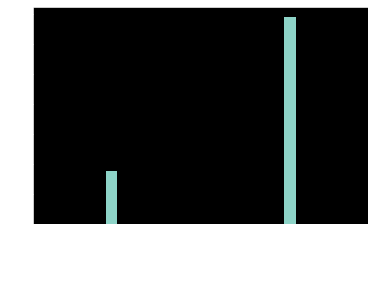

In [11]:
df.isnull().sum().plot(kind="bar")

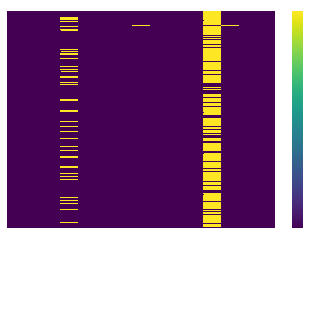

In [19]:
#or you can also use heatmap from seaborn to plot
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [38]:
# Producing the staatisitcs of the missing value out of toal for all
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(df[i].isnull().sum())
    else:
        print(df[i])
        
 
    

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64
0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64
0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object
177
0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: sibsp, Length: 891, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: parch, Length: 891, dtype: int64
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64
2
0       Third
1       First
2       Third

In [47]:
a=df["age"].isnull().sum()
b=len(df)

In [60]:
print(f" the percentage of missing values for Age is  {round((a/b) * 100 ,2)}")

 the percentage of missing values for Age is  19.87


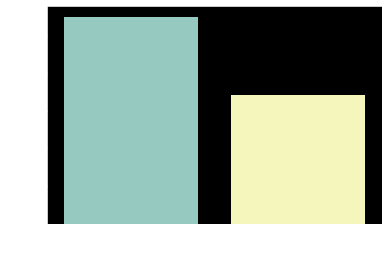

In [68]:
#Making a count plot of all features
sns.countplot(df["survived"])

In [65]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

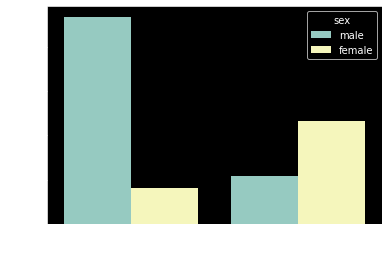

In [70]:
sns.countplot(df["survived"], hue=df["sex"])

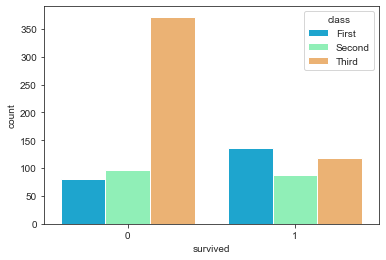

In [71]:
sns.set_style("ticks")
sns.countplot(df["survived"],hue=df["class"], palette='rainbow')

In [72]:
#Dropping Null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

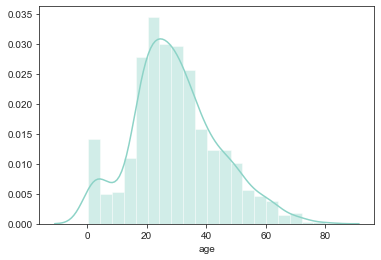

In [73]:
sns.distplot(df['age'].dropna())

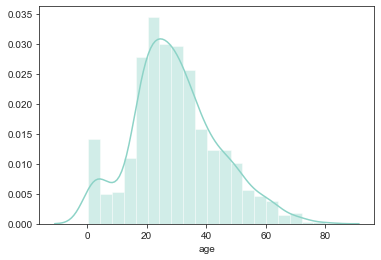

In [74]:
# Without dropping nulls
sns.distplot(df['age'])  # not too much of a difference in distribution

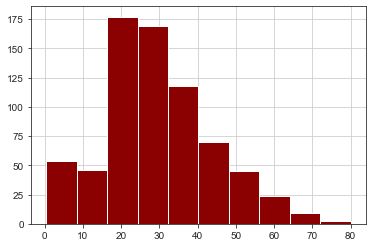

In [76]:
df['age'].hist(color="darkred")

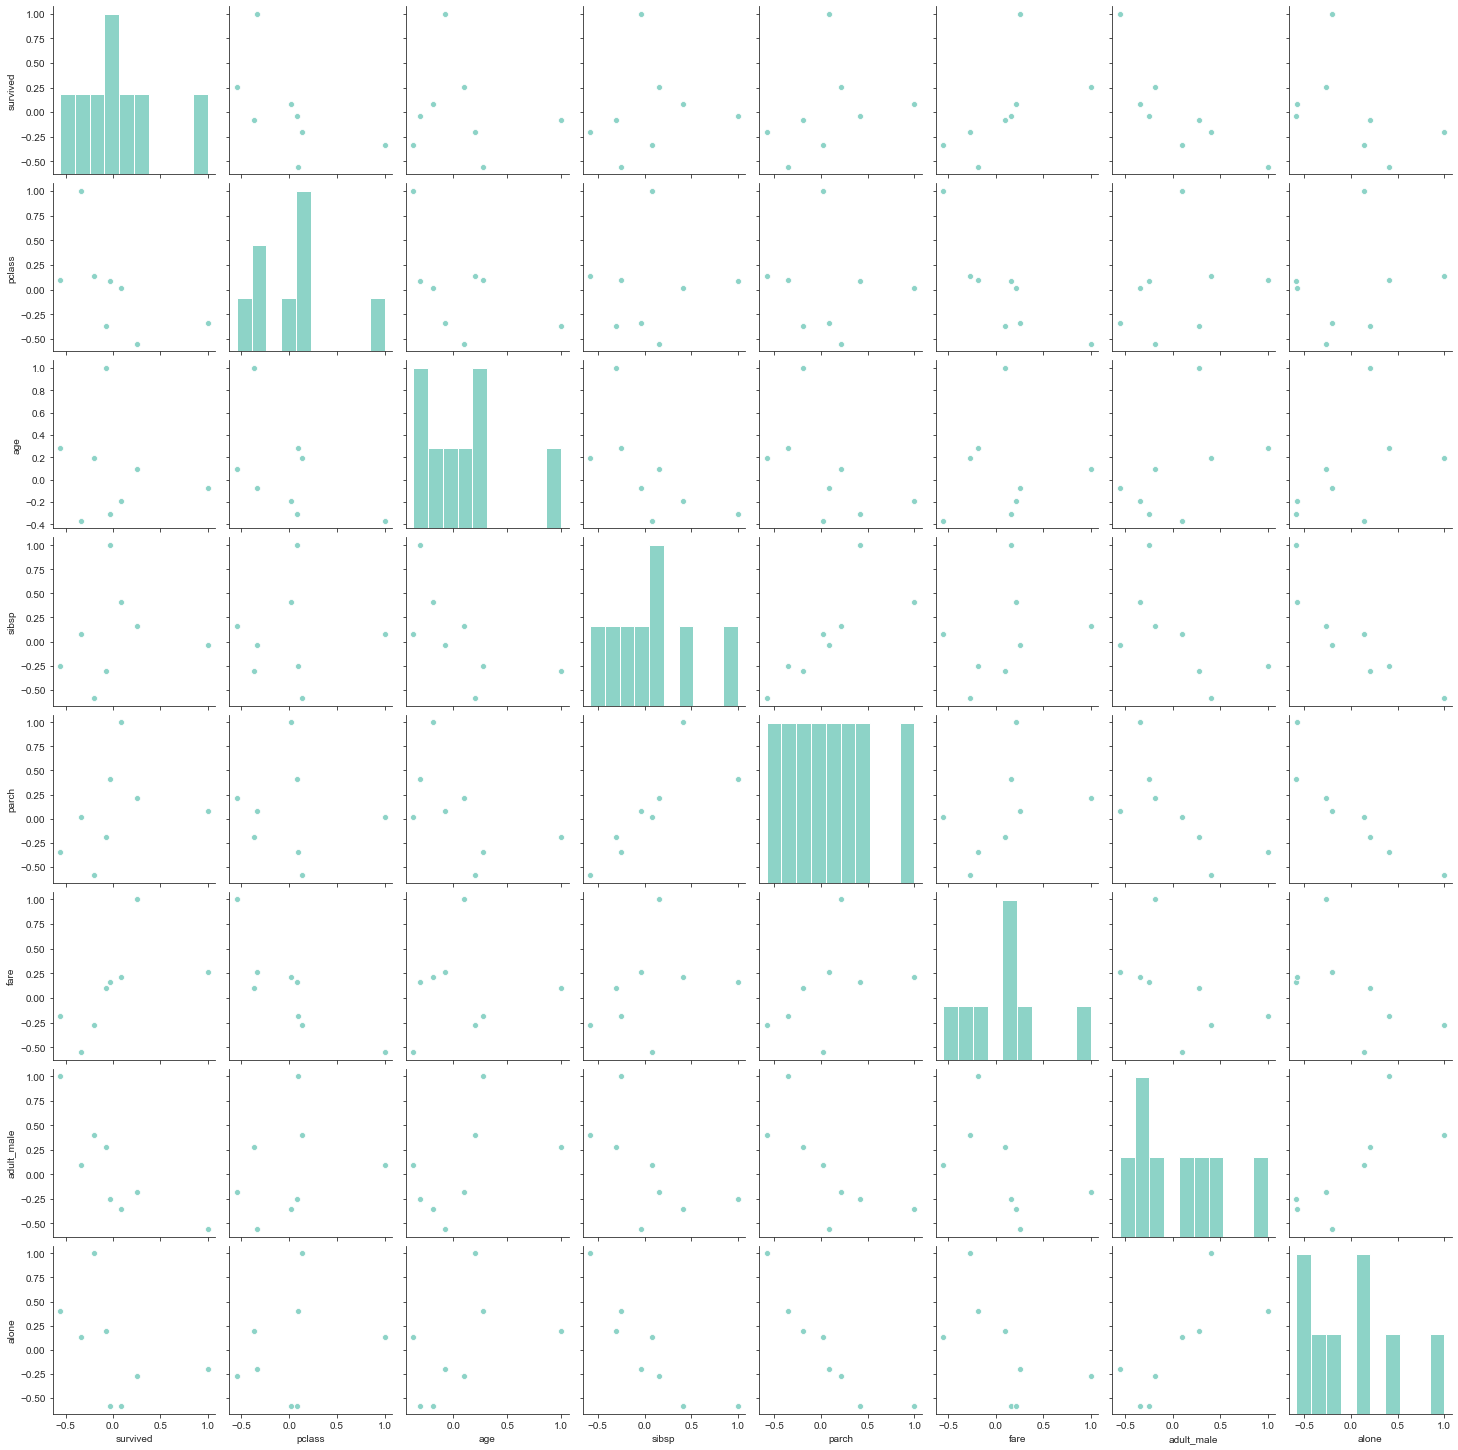

In [77]:
sns.pairplot(df.corr())

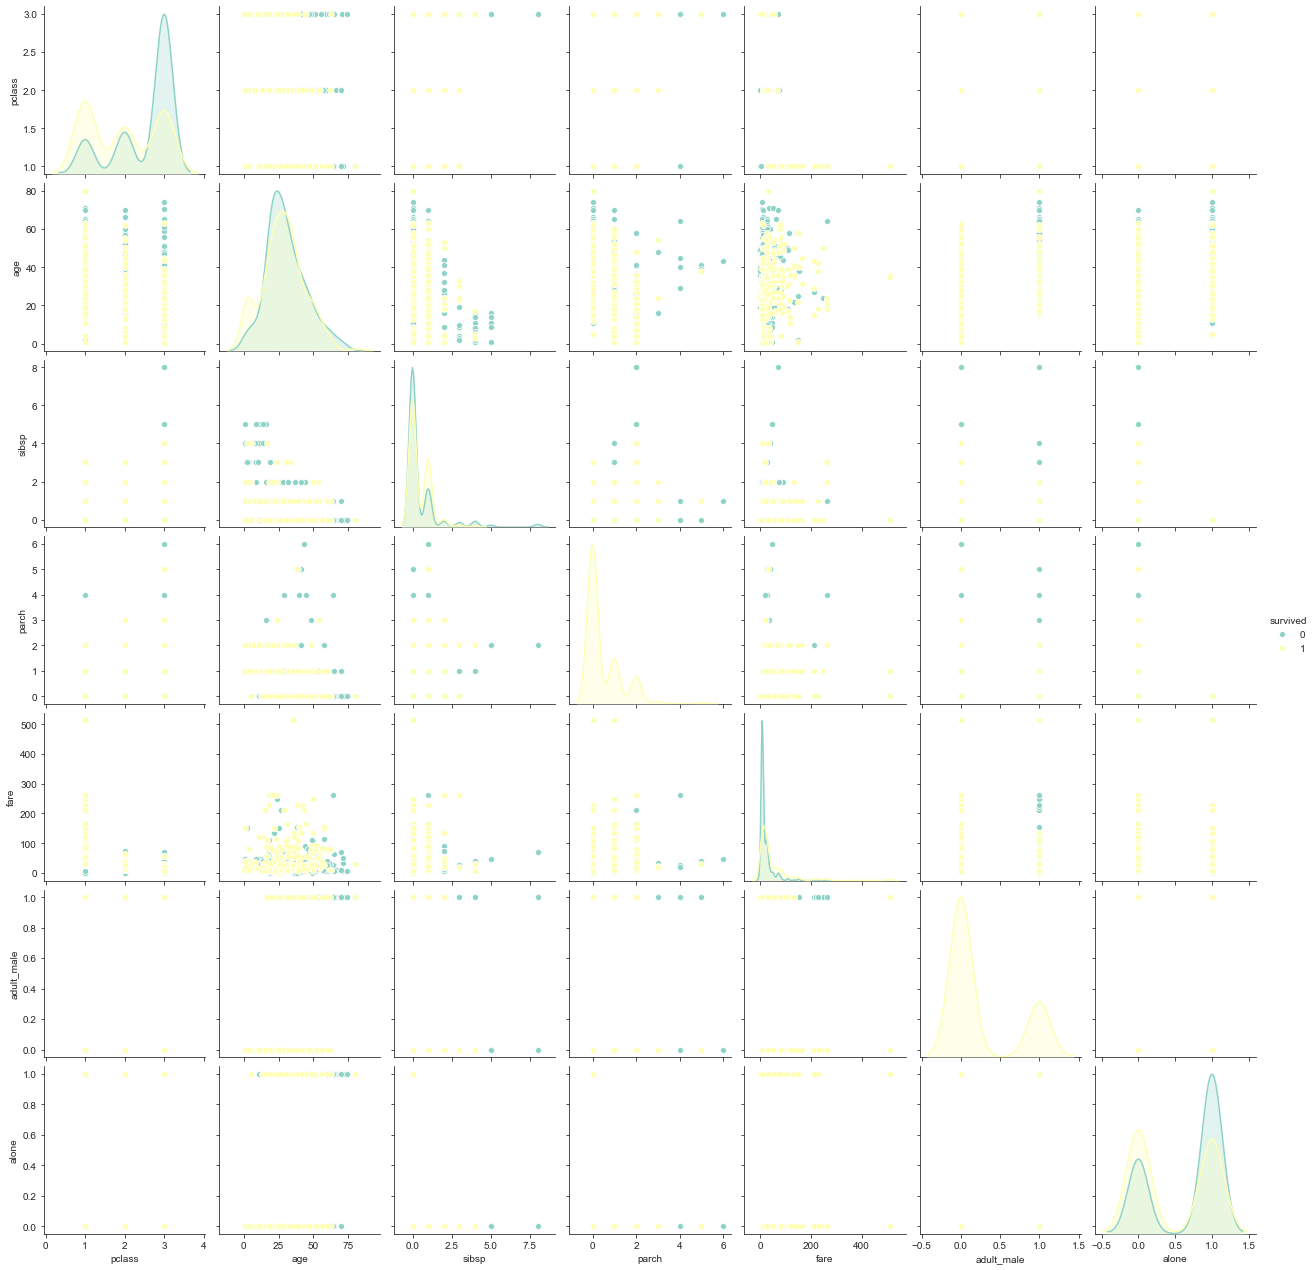

In [78]:
sns.pairplot(df, hue='survived')

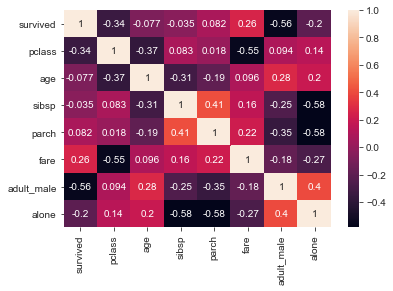

In [79]:
sns.heatmap(df.corr(), annot=True)

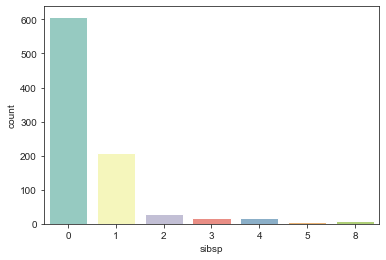

In [80]:
sns.countplot(df["sibsp"])

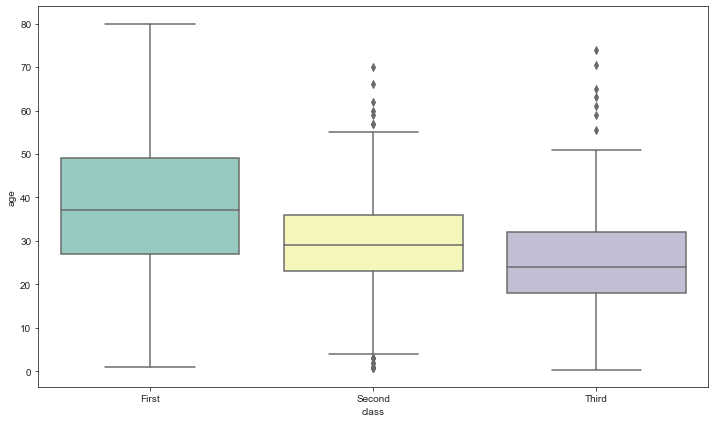

In [94]:
plt.figure(figsize=(12,7))
sns.boxplot(df["class"],df["age"])

In [95]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [101]:
# Impute age nulls with average age value for boxplot. There is a good correlation between class and age thats why we used that. You can try others
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [102]:
#Applyig the function
df["age"]=df[['age','class']].apply(impute_age, axis=1)

In [109]:
df[df["age"] ==27]

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
8           1       3  female  27.0      0      2   11.1333        S   Third   
41          0       2  female  27.0      1      0   21.0000        S  Second   
146         1       3    male  27.0      0      0    7.7958        S   Third   
216         1       3  female  27.0      0      0    7.9250        S   Third   
221         0       2    male  27.0      0      0   13.0000        S  Second   
321         0       3    male  27.0      0      0    7.8958        S   Third   
377         0       1    male  27.0      0      2  211.5000        C   First   
551         0       2    male  27.0      0      0   26.0000        S  Second   
607         1       1    male  27.0      0      0   30.5000        S   First   
620         0       3    male  27.0      1      0   14.4542        C   Third   
681         1       1    male  27.0      0      0   76.7292        C   First   
717         1       2  female  27.0      0      0   10.5000        S  Second   
724         1       1    male  27.0      1      0   53.1000        S   First   
804         1       3    male  27.0      0      0    6.9750        S   Third   
821         1       3    male  27.0      0      0    8.6625        S   Third   
823         1       3  female  27.0      0      1   12.4750        S   Third   
866         1       2  female  27.0      1      0   13.8583        C  Second   
886         0       2    male  27.0      0      0   13.0000        S  Second   

       who  adult_male deck  embark_town alive  alone  
8    woman       False  NaN  Southampton   yes  False  
41   woman       False  NaN  Southampton    no  False  
146    man        True  NaN  Southampton   yes   True  
216  woman       False  NaN  Southampton   yes   True  
221    man        True  NaN  Southampton    no   True  
321    man        True  NaN  Southampton    no   True  
377    man        True    C    Cherbourg    no  False  
551    man        True  NaN  Southampton    no   True  
607    man        True  NaN  Southampton   yes   True  
620    man        True  NaN    Cherbourg    no  False  
681    man        True    D    Cherbourg   yes   True  
717  woman       False    E  Southampton   yes   True  
724    man        True    E  Southampton   yes  False  
804    man        True  NaN  Southampton   yes   True  
821    man        True  NaN  Southampton   yes   True  
823  woman       False    E  Southampton   yes  False  
866  woman       False  NaN    Cherbourg   yes  False  
886    man        True  NaN  Southampton    no   True

In [113]:
df["age"].isnull().sum()

0

In [121]:
# Drop the deck column sinceits relevant and have a low correlation
df.drop("deck",inplace=True, axis=1)

In [122]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True

In [124]:
type(df)

pandas.core.frame.DataFrame

In [129]:
df["age"].shape

(889,)

In [126]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [128]:
# Drop embark_town
df.dropna(inplace=True)

Converting Categorical Features
* We will use pandas get dummies to do this. Same as one hot encoding

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.0+ KB


In [131]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [132]:
pd.get_dummies(df["embarked"], drop_first=True).head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [135]:
sex=pd.get_dummies(df["sex"], drop_first=True)
embark=pd.get_dummies(df["embarked"], drop_first=True)

In [136]:
sex

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]

In [137]:
embark

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]

In [138]:
# Append this to the original dataframe
df= pd.concat([df,sex,embark], axis=1)

In [139]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female  24.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male  embark_town alive  alone  male  Q  S  
0      man        True  Southampton    no  False     1  0  1  
1    woman       False    Cherbourg   yes  False     0  0  0  
2    woman       False  Southampton   yes   True     0  0  1  
3    woman       False  Southampton   yes  False     0  0  1  
4      man        True  Southampton    no   True     1  0  1  
..     ...         ...          ...   ...    ...   ... .. ..  
886    man        True  Southampton    no   True     1  0  1  
887  woman       False  Southampton   yes   True     0  0  1  
888  woman       False  Southampton    no  False     0  0  1  
889    man        True    Cherbourg   yes   True     1  0  0  
890    man        True   Queenstown    no   True     1  1  0  

[889 rows x 17 columns]

In [140]:
# So its up to you to do a onehot encoding or Label Encoding. If the attributes are not much do a label encoding and vice versa
#in this demo I did a LE irrespective of the fact that its still small. Drop the one hot encoded attributes after
df.drop(columns=["embarked","sex"],inplace=True)

In [141]:
df.shape

(889, 15)

In [142]:
# Further refinement
df.head()

survived  pclass   age  sibsp  parch     fare  class    who  adult_male  \
0         0       3  22.0      1      0   7.2500  Third    man        True   
1         1       1  38.0      1      0  71.2833  First  woman       False   
2         1       3  26.0      0      0   7.9250  Third  woman       False   
3         1       1  35.0      1      0  53.1000  First  woman       False   
4         0       3  35.0      0      0   8.0500  Third    man        True   

   embark_town alive  alone  male  Q  S  
0  Southampton    no  False     1  0  1  
1    Cherbourg   yes  False     0  0  0  
2  Southampton   yes   True     0  0  1  
3  Southampton   yes  False     0  0  1  
4  Southampton    no   True     1  0  1

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
LE=LabelEncoder()

In [151]:
df['class']=LE.fit_transform(df["class"])

In [165]:
df.head()

survived  pclass   age  sibsp  parch     fare  class  who  adult_male  \
0         0       3  22.0      1      0   7.2500      2    1           1   
1         1       1  38.0      1      0  71.2833      0    2           0   
2         1       3  26.0      0      0   7.9250      2    2           0   
3         1       1  35.0      1      0  53.1000      0    2           0   
4         0       3  35.0      0      0   8.0500      2    1           1   

   embark_town  alive  alone  male  Q  S  
0            2      0      0     1  0  1  
1            0      1      0     0  0  0  
2            2      1      1     0  0  1  
3            2      1      0     0  0  1  
4            2      0      1     1  0  1

In [154]:
df.drop(columns=["lage"], inplace=True, axis=1)

In [156]:
df['alone']=LE.fit_transform(df["alone"])

In [158]:
df['alive']=LE.fit_transform(df["alive"])

In [160]:
df['who']=LE.fit_transform(df["who"])

In [162]:
df['adult_male']=LE.fit_transform(df["adult_male"])

In [164]:
df['embark_town']=LE.fit_transform(df["embark_town"])